Energy with dietary fibre, equated \n(kJ)        9.92
Calcium (Ca) \n(mg)                              9.92
Energy, without dietary fibre, equated \n(kJ)    9.92
Potassium (K) \n(mg)                             9.92
Moisture (water) \n(g)                           9.92
Nitrogen \n(g)                                   9.84
Magnesium (Mg) \n(mg)                            9.84
Sodium (Na) \n(mg)                               9.84
Phosphorus (P) \n(mg)                            9.84
Zinc (Zn) \n(mg)                                 9.84
Protein \n(g)                                    9.84
Ash \n(g)                                        9.84
Iron (Fe) \n(mg)                                 9.60
Niacin derived from tryptophan \n(mg)            9.60
Niacin derived equivalents \n(mg)                9.60
Tryptophan \n(mg)                                9.60
Fat, total \n(g)                                 9.20
Thiamin (B1) \n(mg)                              9.20
Riboflavin (B2) \n(mg)      

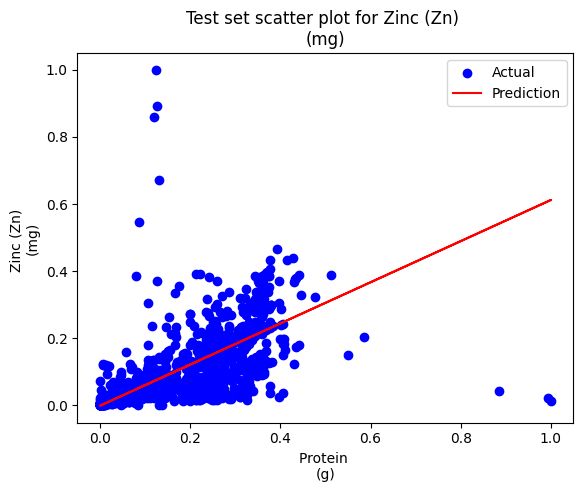

MSE of the linear model trained only by the feature: Protein (g): 0.006676189480719339


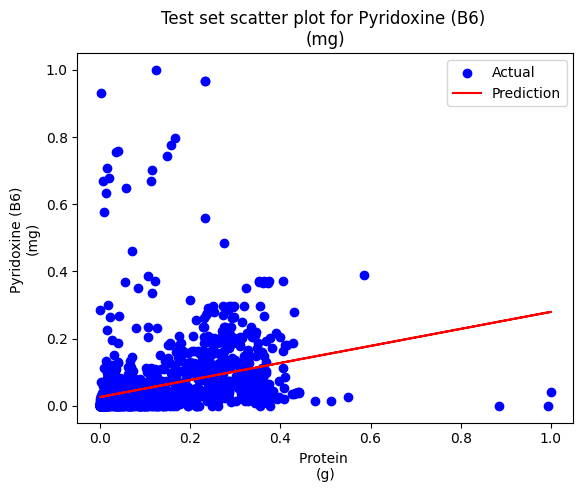

MSE of the linear model trained only by the feature: Protein (g): 0.011583741645962596


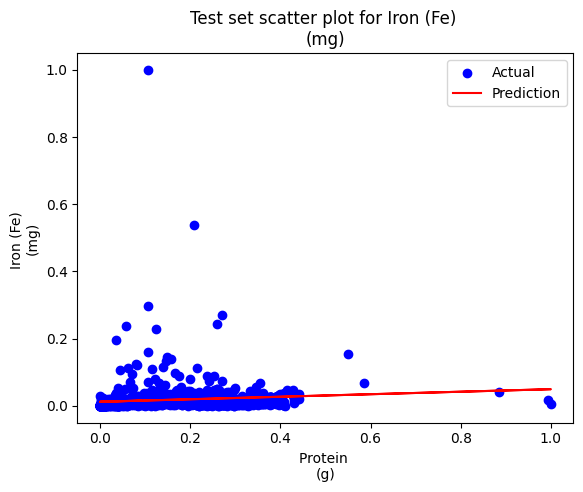

MSE of the linear model trained only by the feature: Protein (g): 0.0014866808795986311


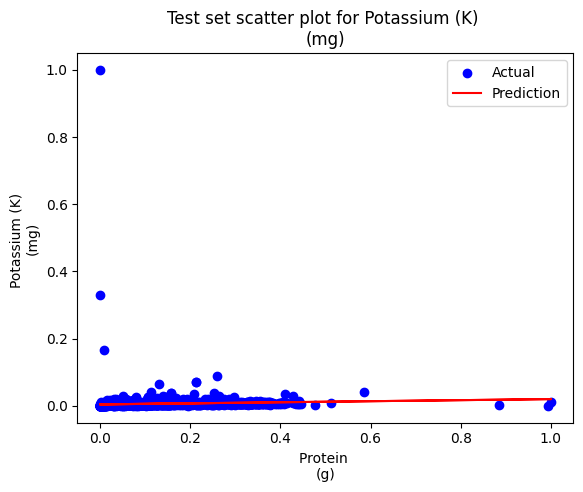

MSE of the linear model trained only by the feature: Protein (g): 0.0009035740156823384


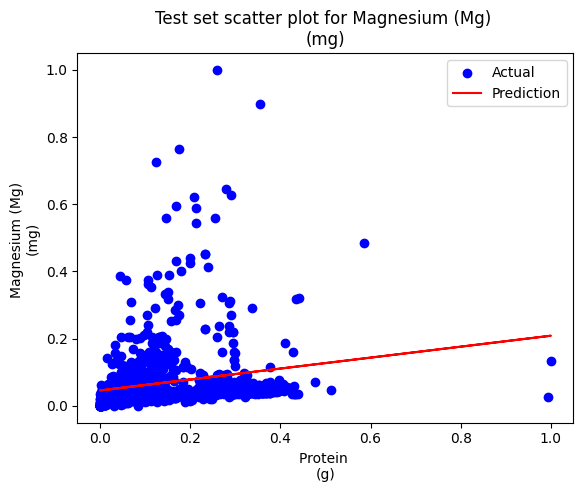

MSE of the linear model trained only by the feature: Protein (g): 0.007581317118941069


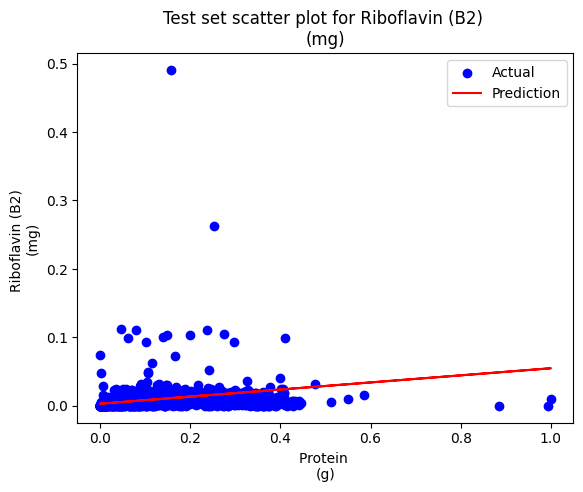

MSE of the linear model trained only by the feature: Protein (g): 0.00038118574681150937


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Read the Excel file (aka. sp|readsheet)
file_path = 'nutrient-file-release2-jan22.xlsx'
# The table is in the sheet: 'All solids & liquids per 100g'
data = pd.read_excel(file_path, sheet_name='All solids & liquids per 100g')

# only wants data after the third column because the first three columns are not nutrients
data = data.iloc[:, 3:]

# drop the column 'Protein \n(g)' because it is the topic we want to study
# data = data.drop(columns=['Protein \n(g)'])

# calculate the missing value ratio
missing_ratios = data.isnull().sum() / len(data)

# calculate the zero value ratio
zero_ratios = (data == 0).sum() / len(data)


# score
scores = pd.Series(0, index=data.columns)



# Calculate scores for the current nutrient
for column in data.columns:
    # 1. missing value ratio
    # for missing values: ==0% + 6, <1.0% + 5.85, <2.0% + 5.55, <5% + 5.15, <10% + 4.15, <20% + 2.15, other no score bonus
    if missing_ratios[column] == 0:
        scores[column] += 6.00
    elif 0 < missing_ratios[column] < 0.01:
        scores[column] += 5.85
    elif 0.01 < missing_ratios[column] < 0.02:
        scores[column] += 5.55
    elif 0.02 < missing_ratios[column] < 0.05:
        scores[column] += 5.15
    elif 0.05 < missing_ratios[column] < 0.1:
        scores[column] += 4.15
    elif 0.1 < missing_ratios[column] < 0.2:
        scores[column] += 2.15

    # 2. zero ratio
    # for zero values: <40% + 1.6, <30% + 2.4, <20% + 3.2, <10% + 3.6, <5% + 3.84, <2% + 3.92, =0 + 4 other no score bonus
    if 0.3 <= zero_ratios[column] < 0.4:
        scores[column] += 1.60
    elif 0.2 <= zero_ratios[column] < 0.3:
        scores[column] += 2.40
    elif 0.1 <= zero_ratios[column] < 0.2:
        scores[column] += 3.20
    elif 0.05 <= zero_ratios[column] < 0.1:
        scores[column] += 3.60
    elif 0.02 <= zero_ratios[column] < 0.05:
        scores[column] += 3.84
    elif 0.0 < zero_ratios[column] < 0.02:
        scores[column] += 3.92
    elif zero_ratios[column] == 0:
        scores[column] += 4.00

# get scores
scores = scores[scores > 9].sort_values(ascending=False)
print(scores)

# select the data with these high scores
data = data[scores.index]

# Initialize a MinMaxScaler, because out of all kinds of stardardizations, MinMaxScaler(aka normalization) is the most suitable for this data as for example the nutrient some of it is mg, some is g, and some g is very spread out some is very concentrated
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame so taht it's easier to work with and plot
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# # Compute the correlation matrix
# corr_scaled = data_scaled.corr()

# # Compute the correlation with 'Protein \n(g)'
# protein_corr_scaled = corr_scaled['Protein \n(g)']

# # Plot the correlation as a bar plot
# plt.figure(figsize=(10, 5))
# protein_corr_scaled[scores.index].sort_values().plot(kind='barh')
# plt.title('Correlation with Protein (Scaled Data)', fontsize=20)
# plt.xlabel('Correlation')
# plt.show()

# # Number of columns for subplot
# n_cols = 2
# # Calculate the number of rows needed for subplot, (len(scores.index ....) because we need the graph to be plot on the same row)
# n_rows = len(scores.index) // n_cols + (len(scores.index) % n_cols > 0)

# # Create empty subplots
# fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 6*n_rows))

# # Flatten the array of axes as it is a list of nutrients
# axs = axs.flatten()

# for nutrient, column in enumerate(scores.index):
#     # Create a scatter plot for the scaled data
#     axs[nutrient].scatter(data_scaled['Protein \n(g)'], data_scaled[column], s = 10)
#     axs[nutrient].set_title(column)
#     axs[nutrient].set_xlabel('Protein \n(g)')
#     axs[nutrient].set_ylabel(column)
# # Plot scatter plots
# plt.tight_layout()
# plt.show()

data_scaled_name = ['Zinc (Zn) \n(mg)','Pyridoxine (B6) \n(mg)', 'Iron (Fe) \n(mg)', 'Potassium (K) \n(mg)', 'Magnesium (Mg) \n(mg)', 'Riboflavin (B2) \n(mg)']
# Only the protein data, only create a new dataframe with the protein and currewnt nutrient column
protein_data = data_scaled[['Protein \n(g)']]

# Loop through each nutrient to fit a linear regression model.
for name in data_scaled_name:
    for column in data_scaled[[name]].columns:
        # Skip 'Protein \n(g)' itself
        if column == 'Protein \n(g)':
            continue

        # the current nutrient data
        nutrient_data = data_scaled[column].dropna()

        # Combine protein and current nutrient data
        combined_data = pd.concat([protein_data, nutrient_data], axis=1)

        # Split the data into training and testing data, test size 80%, training 20%
        train_data, test_data = train_test_split(combined_data, test_size=0.8)

        # Define the training data
        X_train = train_data[['Protein \n(g)']]
        y_train = train_data[column]

        # Define the testing data
        X_test = test_data[['Protein \n(g)']]
        y_test = test_data[column]

        # Fit the model to the training data
        model = LinearRegression().fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Plot the scatter plot and the line of regression (MSE)
        plt.scatter(X_test, y_test, color='blue', label='Actual')
        plt.plot(X_test, predictions, color='red', label='Prediction')
        plt.xlabel('Protein \n(g)')
        plt.ylabel(column)
        plt.title(f'Test set scatter plot for {column}')
        plt.legend()
        plt.show()

        # Print the result
        print('MSE of the linear model trained only by the feature: Protein (g):', mean_squared_error(y_test, predictions))


